In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/signature95/tistory/main/dataset/divvy_daily.csv', index_col = 'date')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 1/1/2014 to 12/31/2017
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rides        1458 non-null   int64  
 1   temperature  1458 non-null   float64
 2   weather      1458 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 45.6+ KB


In [4]:
data.describe()

,rides,temperature
count,1458.000000,1458.000000
mean,6512.506859,53.101448
std,3951.680072,21.002912
min,1.000000,-15.000000
25%,3183.250000,37.265356
50%,6169.000000,55.180167
75%,9289.250000,71.871234
max,16095.000000,87.869579


In [5]:
data.head()

,rides,temperature,weather
date,,,
1/1/2014,95,19.483158,rain or snow
1/2/2014,111,16.833333,rain or snow
1/3/2014,6,-5.633333,clear
1/4/2014,181,30.007735,rain or snow
1/5/2014,32,16.756250,rain or snow


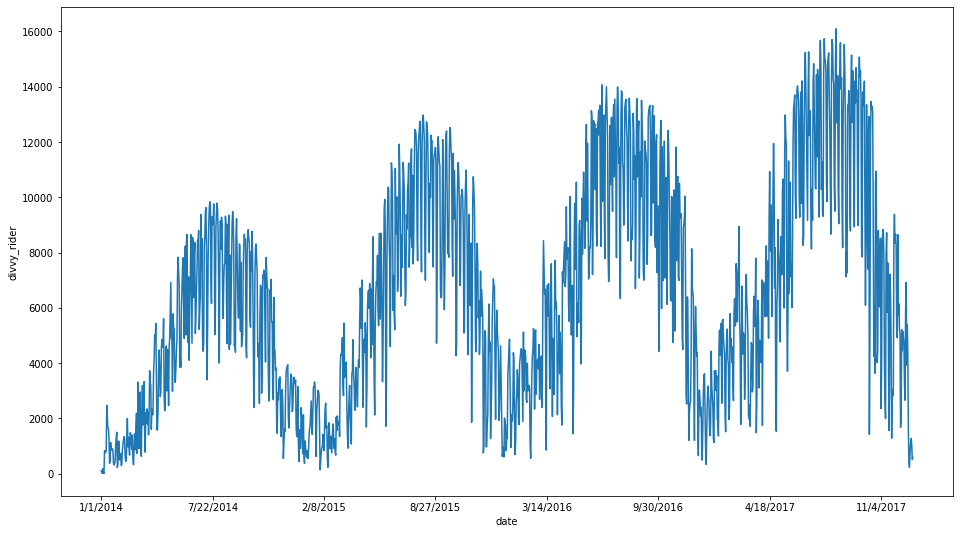

In [6]:
# 시각화
plt.figure(figsize=(16,9))
data.rides.plot(kind='line')
plt.ylabel('divvy_rider')
plt.show()

In [7]:
def adf_test(timeseries, pvalue = .05, regression_option = 'ct'):
    # 라이브러리 호출
    from statsmodels.tsa.stattools import adfuller
    
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', regression = regression_option)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dfoutput[1] < pvalue:
       print(f"정상시계열이 아니라는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성이 보장됩니다.")
    else:
       print(f"정상시계열이 아니라는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성을 보장하지 못합니다.")

def kpss_test(timeseries, pvalue = .05, regression_option = 'ct'):
    # 라이브러리 호출
    from statsmodels.tsa.stattools import kpss
    
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression= regression_option)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    if kpss_output[1] < pvalue:
        print(f"정상시계열이 맞다는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성을 보장하지 못합니다.")
    else:
        print(f"정상시계열이 맞다는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성이 보장됩니다.")

In [8]:
adf_test(data['rides'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.683520
p-value                           0.758045
Lags Used                        22.000000
Number of Observations Used    1435.000000
Critical Value (1%)              -3.965093
Critical Value (5%)              -3.413554
Critical Value (10%)             -3.128854
dtype: float64
정상시계열이 아니라는 귀무가설을 5.0%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성을 보장하지 못합니다.


In [9]:
kpss_test(data['rides'])

Results of KPSS Test:
Test Statistic            0.103919
p-value                   0.100000
Lags Used                24.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64
정상시계열이 맞다는 귀무가설을 5.0%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성이 보장됩니다.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2015: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [10]:
# 1차 차분 진행
diff_data = data['rides'].diff(1).dropna()

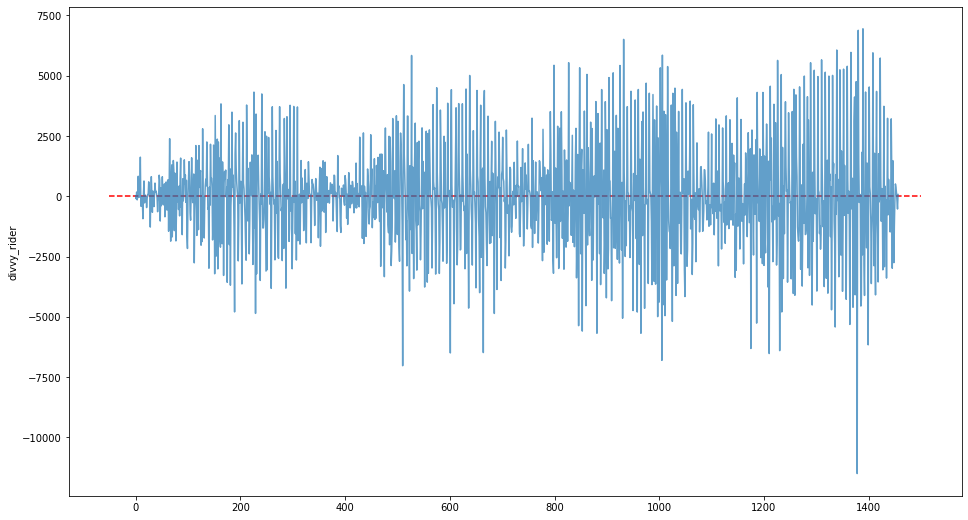

In [11]:
# 표 그리기
plt.figure(figsize=(16,9))
plt.plot(diff_data.values, alpha=.7)
plt.hlines(y=diff_data.mean(), xmin=-50, xmax=1500, colors='red', linestyles='dashed')
plt.ylabel('divvy_rider')
plt.show()

In [12]:
adf_test(diff_data)

Results of Dickey-Fuller Test:
Test Statistic                -9.252496e+00
p-value                        9.827854e-14
Lags Used                      2.100000e+01
Number of Observations Used    1.435000e+03
Critical Value (1%)           -3.965093e+00
Critical Value (5%)           -3.413554e+00
Critical Value (10%)          -3.128854e+00
dtype: float64
정상시계열이 아니라는 귀무가설을 5.0%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성이 보장됩니다.


In [13]:
kpss_test(diff_data)

Results of KPSS Test:
Test Statistic            0.043502
p-value                   0.100000
Lags Used                52.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64
정상시계열이 맞다는 귀무가설을 5.0%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성이 보장됩니다.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2015: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
